In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
  

In [2]:

def my_function():
    """
    Summary line.
  
    Extended description of function.
  
    Parameters:
    arg1 (int): Description of arg1
  
    Returns:
    int: Description of return value
  
    """
    return none

files = os.listdir('daveFiles')


files = [1,2,3]



# ls = []
# for file in files:
#     curFile = pd.read_csv('daveFiles/'+ file)
#     dave = curFile.loc[curFile['Batter']== "Bedrosian, David"]
#     ls.append(dave)

# result = pd.concat(ls,  ignore_index=True)

# result.to_csv('Bedrosian')


In [3]:

from matplotlib.patches import Rectangle

In [4]:
dave = pd.read_csv('Bedrosian.csv')

ls = dave['PitchCall'].unique()

ls


array(['InPlay', 'StrikeSwinging', 'BallCalled', 'FoulBall',
       'StrikeCalled', 'BallinDirt', 'HitByPitch'], dtype=object)

In [5]:


ev = dave.loc[dave['PitchCall']== "InPlay"]

evs = ev['ExitSpeed'].dropna()

bearings = ev['Bearing']

distances = ev['Distance']

events = ev['PlayResult']


b = np.array(bearings)
e = np.array(evs)
d = np.array(distances)


all = pd.DataFrame()
all['exitVelo'] = evs
all['bearing'] = bearings
all['distance'] = distances
all['events'] = events
all = all.dropna()





Bedrosian's Average Exit Velocity on balls in play: 92.167 mph

MLB Average : 87 mph

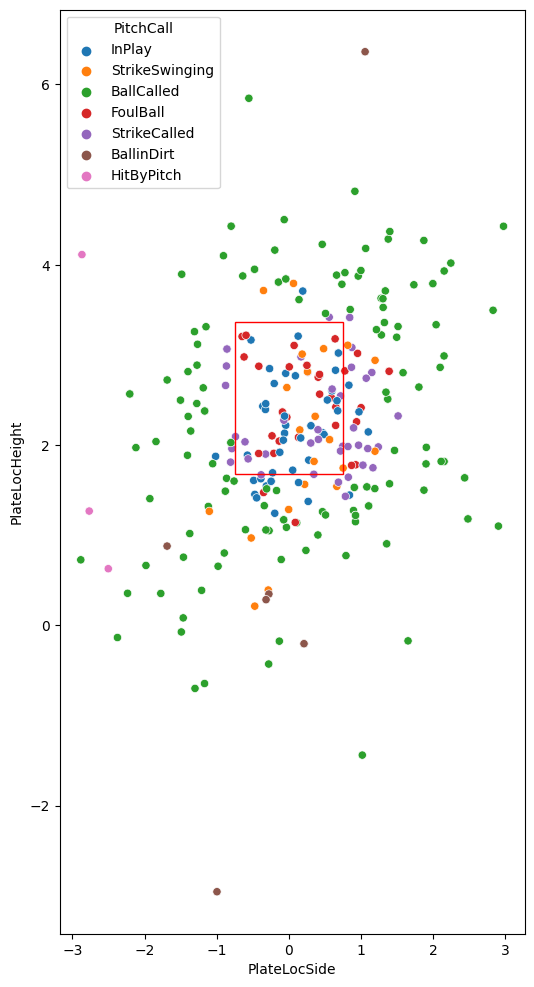

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from matplotlib.patches import Rectangle


fig, ax = plt.subplots()
sns.scatterplot(x='PlateLocSide', y='PlateLocHeight', data = dave, hue='PitchCall')
ax.add_patch( Rectangle((-.75, 1.68),
                        1.5, 1.68,
                        fc ='none',
                        ec ='r',
                        
                        lw = 1) )

# ax.add_patch( Rectangle((-1.25, 1.18),
#                         2.5, 2.68,
#                         fc ='none',
#                         ec ='b',
                        
#                         lw = 1) )

fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

In [7]:
x = np.array(dave['PlateLocSide'])
y = np.array(dave['PlateLocHeight'])

In [8]:

def getChaseRate(df):
    chaseCount = 0
    totalCount = 0
    for index, row in df.iterrows():
        
        if(not(-1.25 <= row['PlateLocSide'] <= 1.25) or not(2.18 <= row['PlateLocHeight']<= 3.86) and (row['PitchCall'] == 'BallCalled' or row['PitchCall'] == 'BallinDirt' or row['PitchCall'] == 'HitByPitch' ) ):
            continue

        if( (not(-.75 <= row['PlateLocSide'] <= .75) or not(1.68 <= row['PlateLocHeight']<= 3.36)) and (row['PitchCall'] == 'StrikeSwinging' or row['PitchCall'] == 'FoulBall' or row['PitchCall'] == 'InPlay') ):
            chaseCount +=1
            totalCount +=1
        else:
            totalCount +=1
        
    print(totalCount)

    return chaseCount/totalCount






In [9]:
getChaseRate(dave)

160


0.2375

Chase Rate otherwise known as O-Swing% measures the number of swings a batter takes on balls out of the zone

* Bedrosian 13.2% chase rate on 301 pitches seen
* MLB average in 2021 was 31.1% 
* Juan Soto lead mlb with a 15.1% chase rate



To go further, if we ignore the pitches that are more than 6 inches outside of the zone (higlighted by the blue box). His chase rate is still only 23.7% on 160 pitches seen. This is not a stat mlb tracks but would put Bedrosian's numbers closer to that realm because there are not as many big misses at that level.


In [10]:
import pybaseball as pybl

In [11]:
from pybaseball import statcast_batter, spraychart, plot_stadium

In [12]:
xLoc = []
yLoc = []

for bVal, dVal in zip(all['bearing'], all['distance']):
    xLoc.append(dVal * (math.sin(math.radians(bVal))))
    yLoc.append(dVal * (math.cos(math.radians(bVal))))



locs = pd.DataFrame()

all['hc_x'] = xLoc
all['hc_y'] = yLoc
all


,exitVelo,bearing,distance,events,hc_x,hc_y
0,101.43013,7.418330,313.89413,Double,40.527764,311.266807
1,96.18529,-23.889865,248.72582,Single,-100.728947,227.416386
2,89.92410,12.269280,8.25786,FieldersChoice,1.754849,8.069248
3,88.07219,6.037148,85.71477,FieldersChoice,9.014900,85.239389
20,100.95397,-7.357911,380.92502,HomeRun,-48.783958,377.788296
40,101.92652,10.697833,436.86266,HomeRun,81.094576,429.269907
41,101.32731,1.742150,116.29746,Single,3.535625,116.243703
42,89.35230,-15.313342,312.54394,Sacrifice,-82.542121,301.447363
59,94.26281,30.938376,21.76208,FieldersChoice,11.188230,18.665788
67,88.45240,12.959170,281.99889,Out,63.240125,274.816413


In [13]:
def statcastConversion(df):
    
    df['hc_y'] = 200 - (df['hc_y']/2.495671)
    df['hc_x'] = 125 + (df['hc_x']/2.495671)



In [14]:
all

,exitVelo,bearing,distance,events,hc_x,hc_y
0,101.43013,7.418330,313.89413,Double,40.527764,311.266807
1,96.18529,-23.889865,248.72582,Single,-100.728947,227.416386
2,89.92410,12.269280,8.25786,FieldersChoice,1.754849,8.069248
3,88.07219,6.037148,85.71477,FieldersChoice,9.014900,85.239389
20,100.95397,-7.357911,380.92502,HomeRun,-48.783958,377.788296
40,101.92652,10.697833,436.86266,HomeRun,81.094576,429.269907
41,101.32731,1.742150,116.29746,Single,3.535625,116.243703
42,89.35230,-15.313342,312.54394,Sacrifice,-82.542121,301.447363
59,94.26281,30.938376,21.76208,FieldersChoice,11.188230,18.665788
67,88.45240,12.959170,281.99889,Out,63.240125,274.816413


In [15]:
data = statcast_batter('2019-05-01', '2019-07-01', 514888)
sub_data = data[data['home_team'] == 'HOU']

Gathering Player Data


In [16]:
try2 = pd.read_csv('sub_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'sub_data.csv'

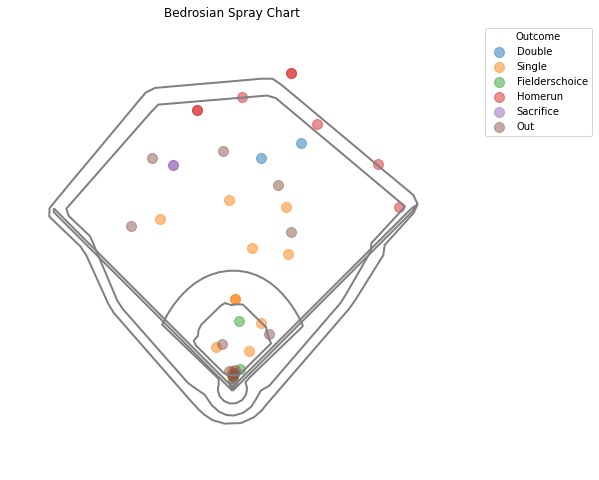

<Axes:title={'center':'Bedrosian Spray Chart'}>

In [ ]:
spraychart(all, '', title='Bedrosian Spray Chart')

In [ ]:
# city = pd.read_csv('cities100.csv')

# endList = []

# for c, C in zip(city['City'], city['Country']):
#     endList.append(c +', ' +C )

# endList





with open('newfile.txt') as fin, open('cashFlows.txt', 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))



In [ ]:
cashFlow = pd.read_csv('cashFlows.csv')
cashFlow

,Breakdown,TTM,12/31/2021,12/31/2020,12/31/2019,12/31/2018
0,Operating Cash Flow,16031000,11497000,5943000,2405000,2097802
1,Investing Cash Flow,-7758000,-7868000,-3132000,-1436000,-2337428
2,Financing Cash Flow,-4289000,-5203000,9973000,1529000,573755
3,End Cash Position,20678000,18144000,19901000,6783000,4276388
4,Income Tax Paid Supplemental Data,-,561000,115000,54000,35409
5,Interest Paid Supplemental Data,-,266000,444000,455000,380836
6,Capital Expenditure,-7128000,-8014000,-3242000,-1437000,-2319516
7,Issuance of Capital Stock,-,0,12269000,848000,0
8,Issuance of Debt,1250000,8883000,9713000,10669000,6176173
9,Repayment of Debt,-6075000,-14615000,-12201000,-9871000,-6087029


# Globe Sisters Task



## Post Page

* Adds desired location to a listview upon pressing enter on keyboard input
* Has a list of 100 suggested cities that updates suggestions as you type 
* You don not have to choose a suggested city you can type any location and press enter
* The floating action save button at the bottom clears the list it doesn't actually save response anywhere

## Profile Page
* Takes a User object as a parameter and builds a layout based on User features
* User class takes a birthday, a current location, an image path, a list of interests, a phone mumber, an email, a name, and a list of locations. 

## Feed Page

* Loads a list of emails and determines what image to display based on the email provided